# Feedforward 🥸

taken from neural_networks_tutorial

In [2]:
from preprocessing_utility import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import activations, layers, optimizers, losses

In [76]:
train,test=ready_to_be_used_dataset(42,image_squared_size=160)

Found 23404 files belonging to 2 classes.
Using 18724 files for training.
Found 23404 files belonging to 2 classes.
Using 4680 files for validation.


Let's look at the images given to feed the network

In [77]:
#https://cloudxlab.com/assessment/displayslide/5658/converting-tensor-to-image
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

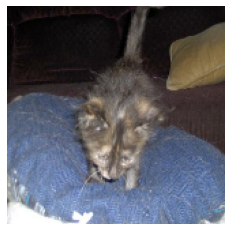

In [82]:
for image_batch, labels_batch in train:
    img=tensor_to_image(image_batch[0])
    plt.imshow(img)
    plt. axis('off') 
    break

#### Model definition

In [11]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(256, 256,3)),
    layers.Dense(50, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(2, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_3 (Dense)             (None, 50)                9830450   
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 9,830,982
Trainable params: 9,830,982
Non-trainable params: 0
_________________________________________________________________


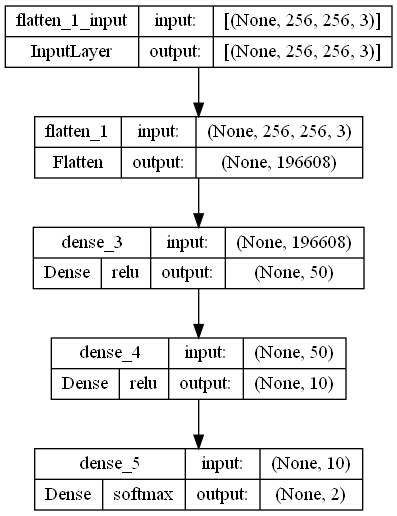

In [12]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [13]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#### Training

In [17]:
%%time
history=model.fit(
  train,
  validation_data=test,
  epochs=10
)

Epoch 1/10
446/446 [==============================] - 80s 178ms/step - loss: 0.6751 - accuracy: 0.6000 - val_loss: 0.6626 - val_accuracy: 0.5987
Epoch 2/10
446/446 [==============================] - 90s 201ms/step - loss: 0.6509 - accuracy: 0.6164 - val_loss: 0.6521 - val_accuracy: 0.6224
Epoch 3/10
446/446 [==============================] - 91s 203ms/step - loss: 0.6534 - accuracy: 0.6146 - val_loss: 0.7022 - val_accuracy: 0.5797
Epoch 4/10
446/446 [==============================] - 84s 187ms/step - loss: 0.6622 - accuracy: 0.6007 - val_loss: 0.6747 - val_accuracy: 0.5880
Epoch 5/10
446/446 [==============================] - 78s 173ms/step - loss: 0.6627 - accuracy: 0.6041 - val_loss: 0.6741 - val_accuracy: 0.5966
Epoch 6/10
446/446 [==============================] - 81s 181ms/step - loss: 0.6566 - accuracy: 0.6127 - val_loss: 0.6617 - val_accuracy: 0.6107
Epoch 7/10
446/446 [==============================] - 90s 200ms/step - loss: 0.6572 - accuracy: 0.6093 - val_loss: 0.6566 - val_ac

#### Performance evaluation